In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# reference dates.
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(2000,1,1)

In [3]:
# function for plotting histogram.
def histogram(df, col_name, bins):
    plt.hist(df[col_name], alpha=0.5, label=col_name, bins=bins)
    plt.legend(loc='upper right')
    plt.show()

# function to convert a date to age at end_date.
def convert_to_age_days(x):
    td = end_date - x
    return td.days

# function to convert a date to days after start_date.
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [4]:
# read in card dataset.
card_df = pd.read_csv('data/card.asc', sep=';')
card_df.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [5]:
# issued is supposed to be a date. Will convert it.
card_df.dtypes

card_id     int64
disp_id     int64
type       object
issued     object
dtype: object

In [6]:
# convert issued to datetime object.
card_df['issued'] = pd.to_datetime(card_df['issued'].str[:6], format='%y%m%d')

In [7]:
# check datatypes after conversion.
card_df.dtypes

card_id             int64
disp_id             int64
type               object
issued     datetime64[ns]
dtype: object

In [8]:
# check converted column for any null values.
card_df['issued'].isnull().sum()

0

In [9]:
# convert date to days.
card_df['card_issued_date'] = card_df['issued'].map(convert_date_to_days)
del card_df['issued']

In [10]:
# card_issued_date is now an int64.
card_df.dtypes

card_id              int64
disp_id              int64
type                object
card_issued_date     int64
dtype: object

In [11]:
# rename columns to better names.
card_df = card_df.rename(columns={'type': 'card_type'})
card_df.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [12]:
# examine client dataset.
client_df = pd.read_csv('data/client.asc', sep=';')
client_df = client_df.rename(columns={'district_id': 'client_district_id'})

client_df.head()

,client_id,birth_number,client_district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [13]:
client_df.dtypes

client_id             int64
birth_number          int64
client_district_id    int64
dtype: object

In [14]:
# functions that process the format of the birth_number.

# returns the middle two digits of a six digit integer.
def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# returns the month of birth_number.
def get_day(x):
    return x % 100

# returns the year of birth_number.
def get_year(x):
    return int(x/10000)

# returns the gender by examining birth_number.
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# converts the birth_number into a date.
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# converts birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client_df['client_age'] = client_df['birth_number'].map(convert_birthday_to_age)
client_df['client_gender'] = client_df['birth_number'].map(get_gender)
del client_df['birth_number']


In [15]:
client_df.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,29.071233,F
1,2,1,54.942466,M
2,3,1,59.268493,F
3,4,5,43.112329,M
4,5,5,39.523288,F


In [16]:
account_df = pd.read_csv('data/account.asc', sep=';')
account_df = account_df.rename(columns={'district_id': 'account_district_id'})

account_df.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [17]:
account_df['date'] = account_df['date'].map(convert_int_to_date)
account_df['account_date_opened'] = account_df['date'].map(convert_date_to_days)
del account_df['date']

In [18]:
account_df.head()

,account_id,account_district_id,frequency,account_date_opened
0,576,55,POPLATEK MESICNE,0
1,3818,74,POPLATEK MESICNE,0
2,704,55,POPLATEK MESICNE,0
3,2378,16,POPLATEK MESICNE,0
4,2632,24,POPLATEK MESICNE,1


In [19]:
account_df['frequency'].value_counts()

POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: frequency, dtype: int64

In [20]:
# translate frequency to english.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account_df['frequency'] = account_df['frequency'].map(convert_freq_to_eng)

In [21]:
account_df = account_df.rename(columns={'frequency': 'statement_freq'})
account_df.head()


,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [22]:
# rename disp_type.
disp_df = pd.read_csv('data/disp.asc', sep=';')

disp_df = disp_df.rename(columns={'type': 'disp_type'})
disp_df.head()

,disp_id,client_id,account_id,disp_type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [23]:
disp_df['disp_type'].value_counts()

OWNER        4500
DISPONENT     869
Name: disp_type, dtype: int64

In [24]:
district_df = pd.read_csv('data/district.asc', sep=';')

# rename A1 so it is clear that it is district_id.
district_df = district_df.rename(columns={'A1':'district_id', 'A2':'district_name', 'A3':'region', 'A4':'num_inhabitants', 'A5':'num_munipalities_gt499',
 'A6':'num_munipalities_500to1999', 'A7':'num_munipalities_2000to9999', 'A8':'num_munipalities_gt10000',
 'A9':'num_cities', 'A10':'ratio_urban', 'A11':'average_salary', 'A12':'unemp_rate95', 'A13': 'unemp_rate96',
 'A14':'num_entrep_per1000', 'A15':'num_crimes95', 'A16':'num_crimes96'})


district_df.head()

,district_id,district_name,region,num_inhabitants,num_munipalities_gt499,num_munipalities_500to1999,num_munipalities_2000to9999,num_munipalities_gt10000,num_cities,ratio_urban,average_salary,unemp_rate95,unemp_rate96,num_entrep_per1000,num_crimes95,num_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [25]:
# something wrong with unemp_rate95 and num_crimes95.
print(district_df.dtypes)
district_df['unemp_rate95'].value_counts()[50:100]
district_df['num_crimes95'].value_counts()[1:50]

def convert_question_marks(x, typ):
    if x == '?':
        return -1
    elif typ == 'float':
        return float(x)
    else:
        return int(x)
    
district_df['unemp_rate95'] = district_df['unemp_rate95'].apply(convert_question_marks, args=('float',))
district_df['num_crimes95'] = district_df['num_crimes95'].apply(convert_question_marks, args=('int',))


district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_munipalities_gt499           int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemp_rate95                    object
unemp_rate96                   float64
num_entrep_per1000               int64
num_crimes95                    object
num_crimes96                     int64
dtype: object


In [26]:
print(district_df.dtypes)

district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_munipalities_gt499           int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemp_rate95                   float64
unemp_rate96                   float64
num_entrep_per1000               int64
num_crimes95                     int64
num_crimes96                     int64
dtype: object


In [27]:
loan_df = pd.read_csv('data/loan.asc', sep=';')
loan_df.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [28]:
# convert loan date to integer.
loan_df['date'] = loan_df['date'].map(convert_int_to_date)
loan_df['loan_date'] = loan_df['date'].map(convert_date_to_days)
del loan_df['date']

In [29]:
loan_df = loan_df.rename(columns={'amount': 'loan_amount', 'duration':'loan_duration', 'payments':'monthly_loan_payment', 'status':'loan_status'})
loan_df.head()

,loan_id,account_id,loan_amount,loan_duration,monthly_loan_payment,loan_status,loan_date
0,5314,1787,96396,12,8033.0,B,185
1,5316,1801,165960,36,4610.0,A,191
2,6863,9188,127080,60,2118.0,A,208
3,5325,1843,105804,36,2939.0,A,214
4,7240,11013,274740,60,4579.0,A,248


In [30]:
order_df = pd.read_csv('data/order.asc', sep=';')
order_df.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [31]:
order_df['k_symbol'].value_counts()

SIPO        3502
            1379
UVER         717
POJISTNE     532
LEASING      341
Name: k_symbol, dtype: int64

In [32]:
# translate k_symbol to english.
def convert_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SIPO':
        return 'HOUSEHOLD_PAYMENT'
    elif x == 'LEASING':
        return 'LEASING_PAYMENT'
    elif x == 'UVER':
        return 'LOAN_PAYMENT'
    else:
        return 'UNKNOWN'

In [33]:
order_df['order_k_symbol'] = order_df['k_symbol'].map(convert_k_symbol_to_eng)
del order_df['k_symbol']

In [34]:
order_df = order_df.rename(columns={'bank_to': 'order_bank_to', 'account_to':'order_account_to', 'amount':'order_amount'})
order_df.head()

,order_id,account_id,order_bank_to,order_account_to,order_amount,order_k_symbol
0,29401,1,YZ,87144583,2452.0,HOUSEHOLD_PAYMENT
1,29402,2,ST,89597016,3372.7,LOAN_PAYMENT
2,29403,2,QR,13943797,7266.0,HOUSEHOLD_PAYMENT
3,29404,3,WX,83084338,1135.0,HOUSEHOLD_PAYMENT
4,29405,3,CD,24485939,327.0,UNKNOWN


In [35]:
trans_df = pd.read_csv('data/trans.asc', sep=';', low_memory=False)
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [36]:
trans_df['k_symbol'].value_counts()

UROK           183114
SLUZBY         155832
SIPO           118065
                53433
DUCHOD          30338
POJISTNE        18500
UVER            13580
SANKC. UROK      1577
Name: k_symbol, dtype: int64

In [37]:
def convert_trans_type_to_eng(x):
    if x == 'PRIJEM':
        return 'CREDIT'
    elif x == 'VYDAJ':
        return 'WITHDRAWAL'
    else:
        return 'UNKNOWN'
    
def convert_trans_op_to_eng(x):
    if x == 'VYBER KARTOU':
        return 'CC_WITHDRAWAL'
    elif x == 'VKLAD':
        return 'CREDIT_IN_CASH'
    elif x == 'PREVOD Z UCTU':
        return 'COLLECTION_FROM_OTHER_BANK'
    elif x == 'VYBER':
        return 'WITHDRAWAL_IN_CASH'
    elif x == 'PREVOD NA UCET':
        return 'REMITTANCE_TO_OTHER_BANK'    
    else:
        return 'UNKNOWN'
    
def convert_trans_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SLUZBY':
        return 'PAYMENT_FOR_STATEMENT'
    elif x == 'UROK':
        return 'INTEREST_CREDITED'
    elif x == 'SANKC. UROK':
        return 'SANCTION_INTEREST'
    elif x == 'SIPO':
        return 'HOUSEHOLD'
    elif x == 'DUCHOD':
        return 'OLD_AGE_PENSION'  
    elif x == 'UVER':
        return 'LOAN_PAYMENT'      
    else:
        return 'UNKNOWN'

In [38]:
trans_df['trans_type'] = trans_df['type'].map(convert_trans_type_to_eng)
trans_df['trans_operation'] = trans_df['operation'].map(convert_trans_op_to_eng)
trans_df['trans_k_symbol'] = trans_df['k_symbol'].map(convert_trans_k_symbol_to_eng)

del trans_df['type']
del trans_df['operation']
del trans_df['k_symbol']

In [39]:
trans_df['date'] = trans_df['date'].map(convert_int_to_date)
trans_df['trans_date'] = trans_df['date'].map(convert_date_to_days)
del trans_df['date']


trans_df = trans_df.rename(columns={'amount': 'trans_amount', 'balance':'balance_after_trans', 'bank':'trans_bank_partner', 'account':'trans_account_partner'})
trans_df.head(n=20)

,trans_id,account_id,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol,trans_date
0,695247,2378,700.0,700.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
1,171812,576,900.0,900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
2,207264,704,1000.0,1000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
3,1117247,3818,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
4,579373,1972,400.0,400.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1
5,771035,2632,1100.0,1100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1
6,452728,1539,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2
7,725751,2484,1100.0,1100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2
8,497211,1695,200.0,200.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2
9,232960,793,800.0,800.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2


In [40]:
loan_df.head()

,loan_id,account_id,loan_amount,loan_duration,monthly_loan_payment,loan_status,loan_date
0,5314,1787,96396,12,8033.0,B,185
1,5316,1801,165960,36,4610.0,A,191
2,6863,9188,127080,60,2118.0,A,208
3,5325,1843,105804,36,2939.0,A,214
4,7240,11013,274740,60,4579.0,A,248


Missing account ids in loan_df: 0

Loans/account: 0.15155555555555555

count     682.000000
mean     1367.233138
std       530.368738
min       185.000000
25%       914.500000
50%      1497.500000
75%      1806.500000
max      2167.000000
Name: loan_date, dtype: float64


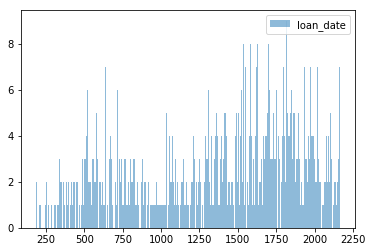

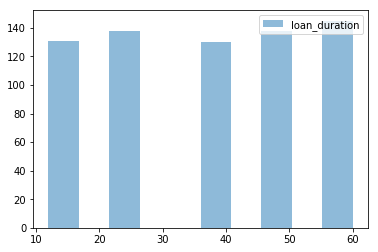

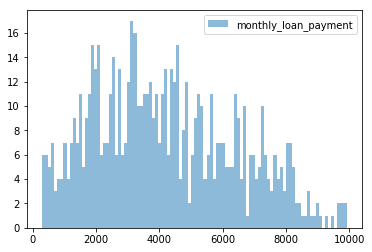

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F880474160>],
      dtype=object)

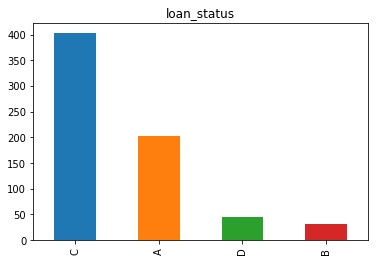

In [41]:
# data quality checks for loan.

# count how many are in loan_df but not in account_df
missing_account_ids = np.isin(loan_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in loan_df: {}'.format(missing_account_ids))

print()
# loans per account. Does this make sense?
loans_per_account = len(loan_df)/len(account_df)
print('Loans/account: {}'.format(loans_per_account))

print()

# print summary of loan_date. Earliest occurred in 1993. Latest in 1999.
print(loan_df['loan_date'].describe())

# look at date.
histogram(loan_df, 'loan_date', 300)
    
# look at loan_duration.
histogram(loan_df, 'loan_duration', 10)

# look at monthly_loan_payment.
histogram(loan_df, 'monthly_loan_payment', 100)

# look at loan_status.
#
# 'A stands for contract finished, no problems,
# 'B' stands for contract finished, loan not payed,
# 'C' stands for running contract, OK so far,
# 'D' stands for running contract, client in debt
# Seems to make sense.
#
loan_df['loan_status'].value_counts().plot(kind='bar', subplots=True)

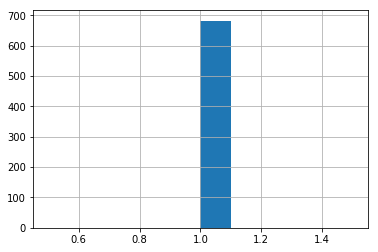

In [42]:
#
# this shows that only one loan for each account that got one.
#
account_count = loan_df.groupby(['account_id'])['loan_id'].count()
account_count.hist()

Missing account ids in order_df: 0

orders/account: 1.438



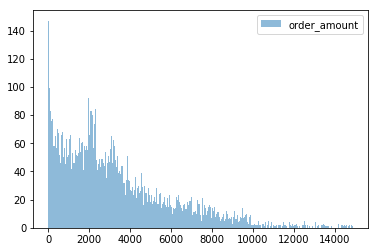

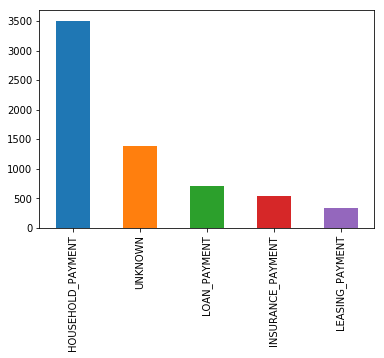

In [43]:
# data quality checks for order.

# orders have no dat?

# count how many are in loan_df but not in account_df
missing_account_ids = np.isin(order_df['account_id'], order_df['account_id'], invert=True).sum()
print('Missing account ids in order_df: {}'.format(missing_account_ids))

print()
# orders per account. Does this make sense?
orders_per_account = len(order_df)/len(account_df)
print('orders/account: {}'.format(orders_per_account))

print()

# look at order_amount.
histogram(order_df, 'order_amount', 300)
    
order_df['order_k_symbol'].value_counts().plot(kind='bar')


In [44]:
order_df.head()

,order_id,account_id,order_bank_to,order_account_to,order_amount,order_k_symbol
0,29401,1,YZ,87144583,2452.0,HOUSEHOLD_PAYMENT
1,29402,2,ST,89597016,3372.7,LOAN_PAYMENT
2,29403,2,QR,13943797,7266.0,HOUSEHOLD_PAYMENT
3,29404,3,WX,83084338,1135.0,HOUSEHOLD_PAYMENT
4,29405,3,CD,24485939,327.0,UNKNOWN


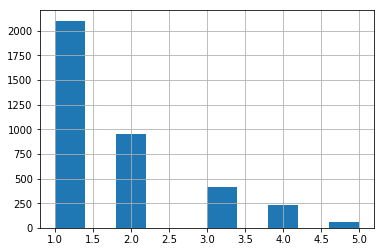

In [45]:
# histogram of the number of orders per account_id
account_count = order_df.groupby(['account_id'])['order_id'].count()
account_count.hist()

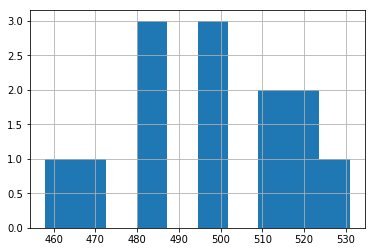

In [46]:
# histogram of the number of orders per order_bank_to
bank_count = order_df.groupby(['order_bank_to'])['order_id'].count()
bank_count.hist()

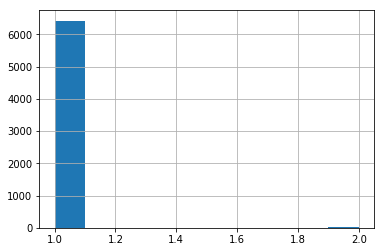

In [47]:
# histogram of the number of orders per order_account_to

#
# Usually not sent to the same account more than once.
#
order_account_count = order_df.groupby(['order_account_to'])['order_id'].count()
order_account_count.hist()

In [48]:
trans_df.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol,trans_date
0,695247,2378,700.0,700.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
1,171812,576,900.0,900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
2,207264,704,1000.0,1000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
3,1117247,3818,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
4,579373,1972,400.0,400.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1


Missing account ids in trans_df: 0

transactions/account: 234.73777777777778



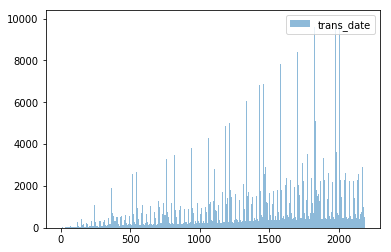

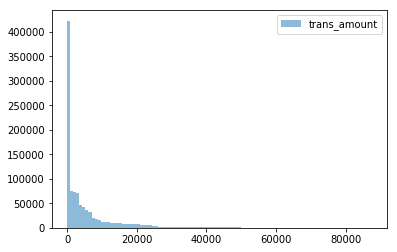

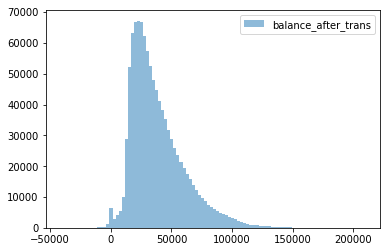

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F1EB9550>],
      dtype=object)

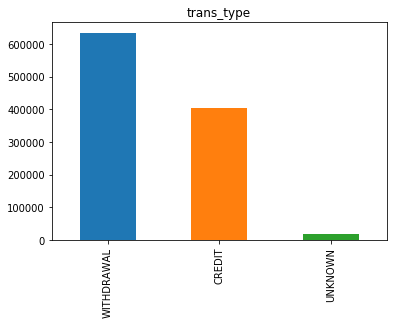

In [49]:
# data quality checks for trans_df.

# count how many are in loan_df but not in account_df
missing_account_ids = np.isin(trans_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in trans_df: {}'.format(missing_account_ids))

print()
# loans per account. Does this make sense?
trx_per_account = len(trans_df)/len(account_df)
print('transactions/account: {}'.format(trx_per_account))

print()

# look at date.
histogram(trans_df, 'trans_date', 1000)
    
# look at loan_duration.
histogram(trans_df, 'trans_amount', 100)

# look at monthly_loan_payment.
histogram(trans_df, 'balance_after_trans', 100)

# look at trans_type.
trans_df['trans_type'].value_counts().plot(kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8815A9DD8>],
      dtype=object)

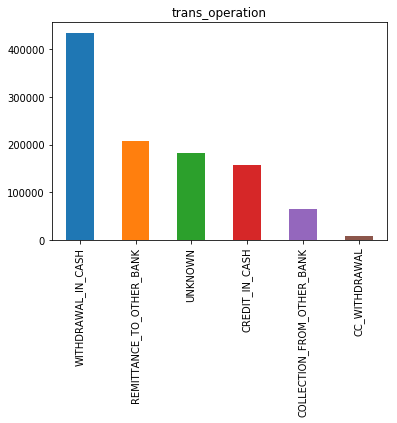

In [50]:
# look at trans_type.
trans_df['trans_operation'].value_counts().plot(kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8817C0A58>],
      dtype=object)

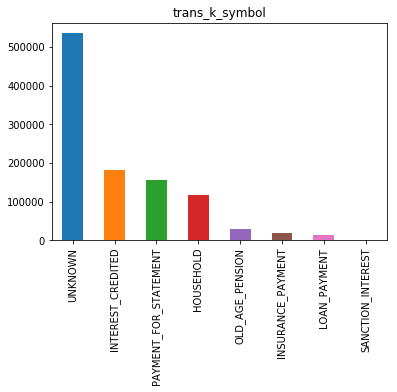

In [51]:
# look at trans_k_symbol.
trans_df['trans_k_symbol'].value_counts().plot(kind='bar', subplots=True)


In [52]:
disp_df.head()

,disp_id,client_id,account_id,disp_type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


Missing account ids in disp_df: 0
Missing client ids in disp_df: 0
Missing account ids in account_df: 0
Missing client ids in client_df: 0
dispositions/account: 1.193111111111111
Missing account ids in owners: 0


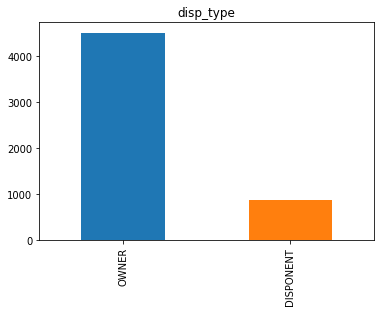

In [53]:
# count how many are in disp_df but not in account_df
missing_account_ids = np.isin(disp_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in disp_df: {}'.format(missing_account_ids))

# count how many are in disp_df but not in client_df
missing_client_ids = np.isin(disp_df['client_id'], client_df['client_id'], invert=True).sum()
print('Missing client ids in disp_df: {}'.format(missing_client_ids))

# count how many are in client_df but not in account_df
missing_account_ids = np.isin(account_df['account_id'], disp_df['account_id'], invert=True).sum()
print('Missing account ids in account_df: {}'.format(missing_account_ids))

# count how many are in client_df but not in disp_df
missing_client_ids = np.isin(client_df['client_id'], disp_df['client_id'], invert=True).sum()
print('Missing client ids in client_df: {}'.format(missing_client_ids))


disp_per_account = len(disp_df)/len(account_df)
print('dispositions/account: {}'.format(disp_per_account))


# look at trans_k_symbol.
disp_df['disp_type'].value_counts().plot(kind='bar', subplots=True)
disp_df['disp_type'].value_counts()

# does every account have an owner. YES!
owners = disp_df.loc[disp_df['disp_type'] == 'OWNER']
missing_account_ids = np.isin(account_df['account_id'], owners['account_id'], invert=True).sum()
print('Missing account ids in owners: {}'.format(missing_account_ids))

In [54]:
district_df.head()

,district_id,district_name,region,num_inhabitants,num_munipalities_gt499,num_munipalities_500to1999,num_munipalities_2000to9999,num_munipalities_gt10000,num_cities,ratio_urban,average_salary,unemp_rate95,unemp_rate96,num_entrep_per1000,num_crimes95,num_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


Missing district ids in account_df: 0
Missing district ids in client_df: 0


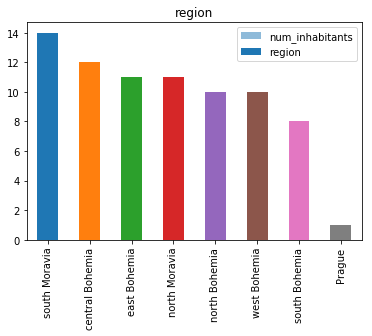

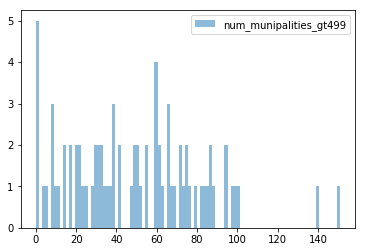

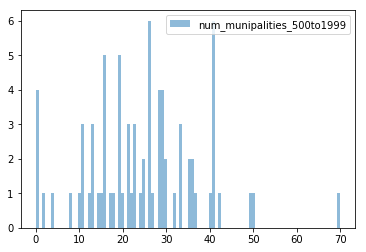

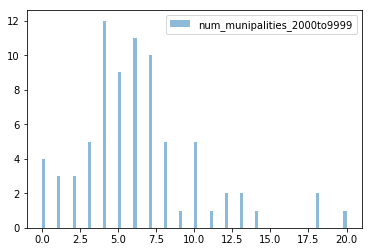

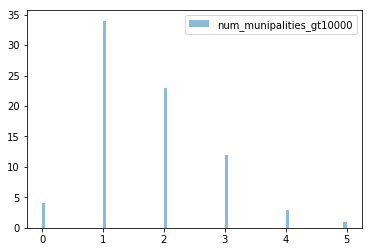

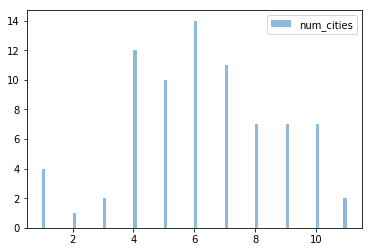

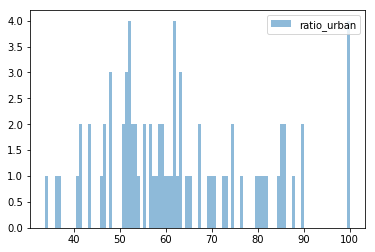

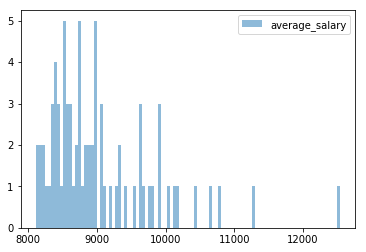

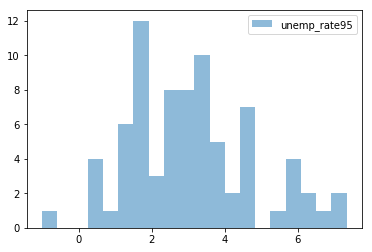

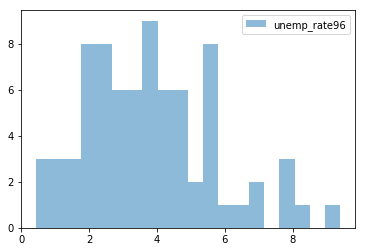

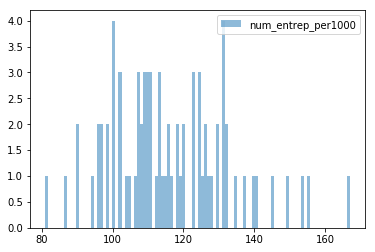

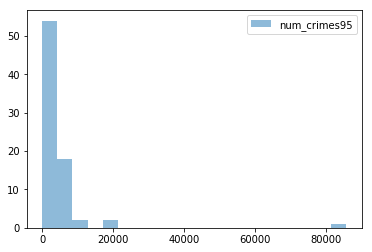

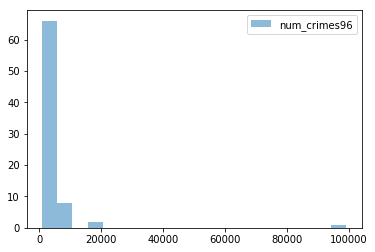

In [55]:
# count how many are in account_df but not in district_df
missing_district_ids = np.isin(account_df['account_district_id'], district_df['district_id'], invert=True).sum()
print('Missing district ids in account_df: {}'.format(missing_district_ids))

missing_district_ids = np.isin(client_df['client_district_id'], district_df['district_id'], invert=True).sum()
print('Missing district ids in client_df: {}'.format(missing_district_ids))

# look at trans_k_symbol.
district_df['region'].value_counts().plot(kind='bar', subplots=True)

# look at num_inhabitants.
histogram(district_df, 'num_inhabitants', 100)
histogram(district_df, 'num_munipalities_gt499', 100)
histogram(district_df, 'num_munipalities_500to1999', 100)
histogram(district_df, 'num_munipalities_2000to9999', 100)
histogram(district_df, 'num_munipalities_gt10000', 100)
histogram(district_df, 'num_cities', 100)
histogram(district_df, 'ratio_urban', 100)
histogram(district_df, 'average_salary', 100)
histogram(district_df, 'unemp_rate95', 20)
histogram(district_df, 'unemp_rate96', 20)
histogram(district_df, 'num_entrep_per1000', 100)
histogram(district_df, 'num_crimes95', 20)
histogram(district_df, 'num_crimes96', 20)



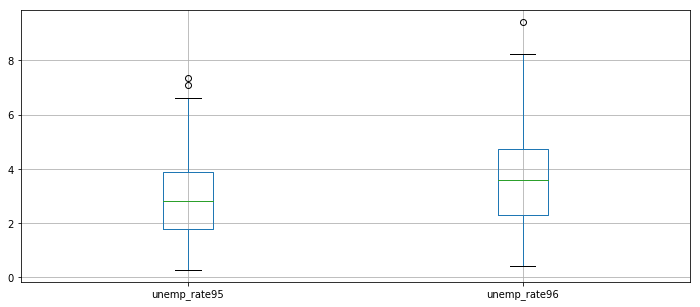

In [56]:

fig, axes = plt.subplots(figsize=(12, 5), sharey=True)
district_df.loc[district_df['unemp_rate95'] > 0, ['unemp_rate95', 'unemp_rate96']].boxplot(return_type='axes')


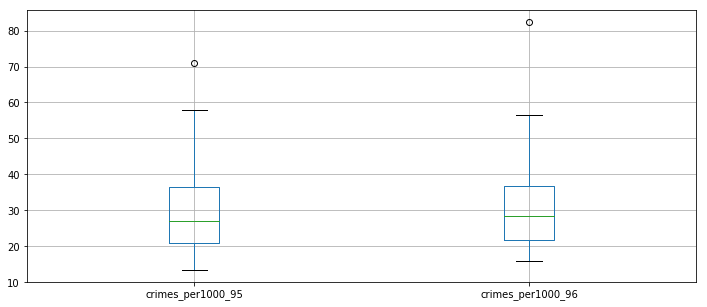

In [57]:
# create crime rates per 1000.
district_df['crimes_per1000_95'] = district_df['num_crimes95']/district_df['num_inhabitants']*1000
district_df['crimes_per1000_96'] = district_df['num_crimes96']/district_df['num_inhabitants']*1000

fig, axes = plt.subplots(figsize=(12, 5), sharey=True)
district_df.loc[district_df['num_crimes95'] > 0 ,['crimes_per1000_95', 'crimes_per1000_96']].boxplot(return_type='axes')

In [58]:
client_df.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,29.071233,F
1,2,1,54.942466,M
2,3,1,59.268493,F
3,4,5,43.112329,M
4,5,5,39.523288,F


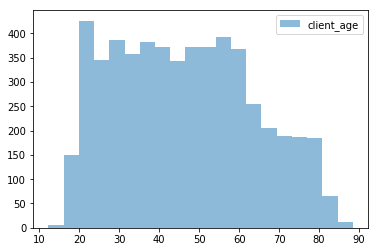

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F880375550>],
      dtype=object)

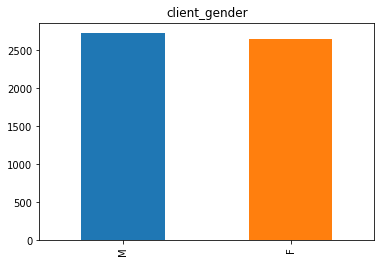

In [59]:
histogram(client_df, 'client_age', 20)
client_df['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [60]:
card_df.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


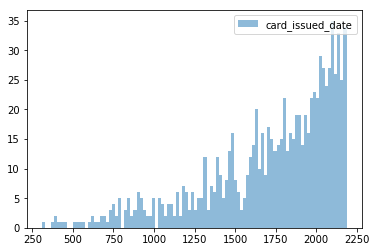

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8F1DE3438>],
      dtype=object)

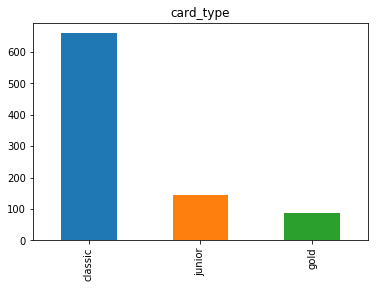

In [61]:
histogram(card_df, 'card_issued_date', 100)
card_df['card_type'].value_counts().plot(kind='bar', subplots=True)

In [62]:
account_df.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


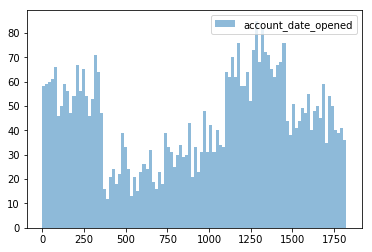

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8804B2FD0>],
      dtype=object)

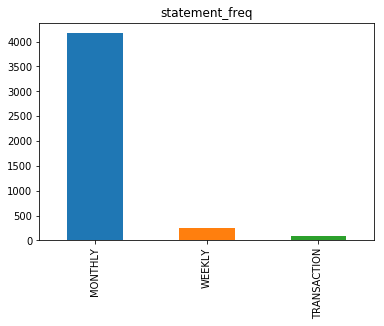

In [63]:
histogram(account_df, 'account_date_opened', 100)
account_df['statement_freq'].value_counts().plot(kind='bar', subplots=True)

In [64]:
account_df.to_pickle('data/account.pkl')
loan_df.to_pickle('data/loan.pkl')
order_df.to_pickle('data/order.pkl')
trans_df.to_pickle('data/trans.pkl')
disp_df.to_pickle('data/disp.pkl')
district_df.to_pickle('data/district.pkl')
client_df.to_pickle('data/client.pkl')
card_df.to_pickle('data/card.pkl')